In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
train_df = pd.read_csv('training_set_VU_DM_2014.csv')
test_df = pd.read_csv('test_set_VU_DM_2014.csv')
combine=（train_df,test_df)

TypeError: an integer is required for the axis

In [2]:
train_s = pd.read_csv('sample.csv')

In [9]:
print(train_df.columns.values)

['srch_id' 'date_time' 'site_id' 'visitor_location_country_id'
 'visitor_hist_starrating' 'visitor_hist_adr_usd' 'prop_country_id'
 'prop_id' 'prop_starrating' 'prop_review_score' 'prop_brand_bool'
 'prop_location_score1' 'prop_location_score2' 'prop_log_historical_price'
 'position' 'price_usd' 'promotion_flag' 'srch_destination_id'
 'srch_length_of_stay' 'srch_booking_window' 'srch_adults_count'
 'srch_children_count' 'srch_room_count' 'srch_saturday_night_bool'
 'srch_query_affinity_score' 'orig_destination_distance' 'random_bool'
 'comp1_rate' 'comp1_inv' 'comp1_rate_percent_diff' 'comp2_rate'
 'comp2_inv' 'comp2_rate_percent_diff' 'comp3_rate' 'comp3_inv'
 'comp3_rate_percent_diff' 'comp4_rate' 'comp4_inv'
 'comp4_rate_percent_diff' 'comp5_rate' 'comp5_inv'
 'comp5_rate_percent_diff' 'comp6_rate' 'comp6_inv'
 'comp6_rate_percent_diff' 'comp7_rate' 'comp7_inv'
 'comp7_rate_percent_diff' 'comp8_rate' 'comp8_inv'
 'comp8_rate_percent_diff' 'click_bool' 'gross_bookings_usd' 'booking_b

In [10]:
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [12]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [13]:
train_df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [40]:
print (train_df.click_bool.describe(percentiles=[.955,0.956] ))
print("-"*40)
train_df.booking_bool.describe(percentiles=[.972,0.973] )

count    4.958347e+06
mean     4.474858e-02
std      2.067514e-01
min      0.000000e+00
50%      0.000000e+00
95.5%    0.000000e+00
95.6%    1.000000e+00
max      1.000000e+00
Name: click_bool, dtype: float64
----------------------------------------


count    4.958347e+06
mean     2.791051e-02
std      1.647165e-01
min      0.000000e+00
50%      0.000000e+00
97.2%    0.000000e+00
97.3%    1.000000e+00
max      1.000000e+00
Name: booking_bool, dtype: float64

only 4.4% listing property was clicked and only 2.7% listing property was booked in training data.

In [85]:
##print(Counter(train_df.visitor_location_country_id))
print(len(Counter(train_df.visitor_location_country_id)))
len(Counter(test_df.visitor_location_country_id))

210


210

totally 210 visitor_location country id in both test and train dataset.

In [38]:
##print(Counter(train_df.prop_country_id))
      
print(len(Counter(train_df.prop_country_id)))
print(len(Counter(test_df.prop_country_id)))
c = Counter(train_df.prop_country_id).keys() - Counter(test_df.prop_country_id).keys()
print (c)

172
167
{7, 79, 111, 19, 87}


totally 172 property country id in train but only 167 country id in test dataset. Shall we delete the unique id in trainset to increase accuarcy?

In [103]:
print(len(Counter(train_df.prop_id)))
print (len(Counter(test_df.prop_id)))
d = Counter(test_df.prop_id).keys() - Counter(train_df.prop_id).keys()
print (len(d))

129113
129438
7773


Totally 129113 prop id in trainset but only 129438 prop id in testset and the id shared on both sets are 121665 , which means 94.23% hotels in train sets present in testsets!!

In [102]:
print(train_df.srch_destination_id.nunique())
print (len(Counter(test_df.srch_destination_id)))
E = Counter(train_df.srch_destination_id).keys() - Counter(test_df.srch_destination_id).keys()
print (len(E))

18127
18049
5666


Total 18127 destination id in testset and id shared on both sets are 12461, 68.74% 

In [111]:
train_df.srch_query_affinity_score.isnull().sum()/len(train_df.srch_query_affinity_score)

0.93598552098108501

the missing value occupies 93.59%, see the table in data overview and find the plot of missing values.

In [160]:
print(train_df[['prop_brand_bool', 'click_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='click_bool', ascending=False))
print(train_df[['prop_brand_bool', 'booking_bool']].groupby(['prop_brand_bool'], as_index=False).mean().sort_values(by='booking_bool', ascending=False))

   prop_brand_bool  click_bool
1                1    0.044884
0                0    0.044513
   prop_brand_bool  booking_bool
1                1      0.029159
0                0      0.025741


We can see people has no big preference on brand chain hotels when deciding if they want to click the listing. But in the end more corelative  

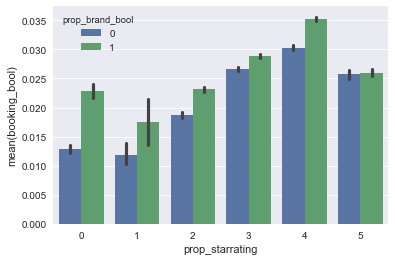

In [6]:
sns.barplot(x="prop_starrating", y="booking_bool", hue = "prop_brand_bool", data = train_df);


as we can see from the plot, 4 star hotel has highest booking rate, then 3,5,2,1. 0 is special since it's just without star info. when the star is low, the brand chain effect has bigger influence on booking rate, but 4star is special, people has more concern on if they are chain brand. 

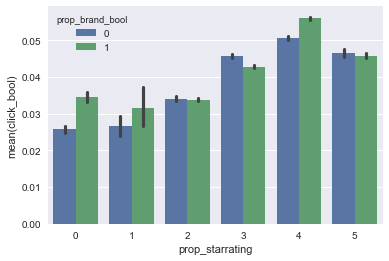

In [7]:
sns.barplot(x="prop_starrating", y="click_bool", hue = "prop_brand_bool", data = train_df);

the brand effect has less influence on if customer is willing to click on the list, the same as booking rate, for 4 star hotel people has more concern on if it's a chain brand but for 3star, much less concern on this point.

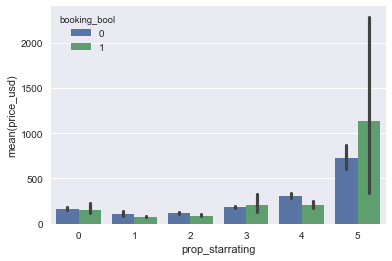

In [8]:
sns.barplot(x="prop_starrating", y="price_usd", hue = "booking_bool", data = train_df);

normally booked hotel price is lower than non booked price, especially for 4 star hotel, but for 5 star hotel the plot is strange, first the highest and lowest price differs a lot. second booked price is higher than non booked price, which implies more expensive more popular, fits the mindset of rich people.

# Transforming Features


In [40]:
for i in c:
    train_df = train_df[(train_df.prop_id != i)]
print (train_df) 




         srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
5              1  2013-04-04 08:32:15       12                          187   
6              1  2013-04-04 08:32:15       12                          187   
7              1  2013-04-04 08:32:15       12                          187   
8              1  2013-04-04 08:32:15       12                          187   
9              1  2013-04-04 08:32:15       12                          187   
10             1  2013-04-04 08:32:15       12                          187   
11             1  2013-04-04 08:32:15       12      

In [50]:
train_df.loc[train_df['prop_id'] == 79]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool


In [66]:
group_prop_avg = train_df.groupby('prop_id').mean

In [64]:
group_prop_std = train_df.groupby('prop_id').std()

In [57]:
group_prop_mid =  train_df.groupby('prop_id').median()

In [204]:
result = pd.read_csv('fake.csv')
#result = result.sort_values(['srch_id','probability'], ascending=[True, False])
fives = result[result.booking_bool == 1].srch_id.count()
logsum5 = fives*5
logsum1 = 0.0
score = 0.0
# count the DCG query by query
uniq_values = result.srch_id.unique()
for u in uniq_values:
    srch_section = result[result.srch_id == u]
    book = srch_section[srch_section.booking_bool == 1].srch_id.count()
    click = srch_section[srch_section.click_bool == 1].srch_id.count()
    for i in range(click):
        logsum1= logsum1+1/(np.log(i+2)/np.log(2))
    for j in range(book):
        logsum1 = logsum1 - 1/(np.log(j+2)/np.log(2))

    for k in range(len(srch_section)):
        
        if ((srch_section.iloc[k]['click_bool'] == 1)&(srch_section.iloc[k]['booking_bool'] == 0)):
            score = score + 1/(np.log(k+2)/np.log(2))
                               
        if ((srch_section.iloc[k]['booking_bool'] == 1)):
            score = score + 5/(np.log(k+2)/np.log(2))


nDCG = score/(logsum5 + logsum1)  
print (nDCG)    

0.925673378863


In [199]:
result = pd.read_csv('result1.csv')
result = result[0:10]
print(result)

   srch_id  prop_id  booking_bool  click_bool   probability
0        1    85728             0           0  1.300000e-10
1        1   107872             0           0  1.860000e-10
2        1    68914             1           1  1.300000e-10
3        1    74474             0           0  1.810000e-10
4        1   111000             0           0  1.810000e-10
5        1   122844             0           0  1.810000e-10
6        1    30184             0           1  1.810000e-10
7        1    95166             0           0  1.640000e-10
8        1    81437             0           1  1.640000e-10
9        1    21315             0           0  1.810000e-10


In [207]:
df = pd.read_csv('training_set_VU_DM_2014.csv')
uniq_values = result.srch_id.unique()
for u in uniq_values:
    srch_section = result[result.srch_id == u] 
    if srch_section[srch_section.booking_bool == 1].srch_id.count()>1:
        print ("multiple booking"+str(u))

multiple booking2


In [210]:
df = pd.read_csv('training_set_VU_DM_2014.csv')


In [226]:
df[df.srch_id==2]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool


In [174]:
result = pd.read_csv('result1.csv')

uniq_values = result.srch_id.unique()
score = 0.0
for u in uniq_values:
    srch_section = result[result.srch_id == u]
    
    for i in range(len(srch_section)):
        
        if ((srch_section.iloc[i]['click_bool'] == 1)&(srch_section.iloc[i]['booking_bool'] == 0)):
            score = score + 1/(np.log(i+2)/np.log(2))
                               
        if ((srch_section.iloc[i]['booking_bool'] == 1)):
            score = score + 5/(np.log(i+2)/np.log(2))


866


In [227]:
result = pd.read_csv('result1.csv')
uniq_values = result.srch_id.unique()

for u in uniq_values:
    book = result[result.booking_bool == 1].srch_id.count()
    click  = result[(result.click_bool == 1)].srch_id.count()
    logsum1 = 0.0
    for i in range(click):
        logsum1= logsum1+1/(np.log(i+2)/np.log(2))
    for j in range(book)
        logsum1 = logsum1 - 1/(np.log(j+2)/np.log(2))


SyntaxError: invalid syntax (<ipython-input-227-5a322e266a96>, line 10)

In [230]:
result = pd.read_csv('result1.csv')
uniq_values = result.srch_id.unique()

score=0.0
j = 0 
for i in range(100):
    if (result.iloc[i-3]['srch_id'] < result.iloc[i-2]['srch_id']):
        j = 0
    else:
        if  (result.iloc[i]['srch_id'] ==  result.iloc[i+1]['srch_id']): 
            if (result.iloc[i]['booking_bool'] == 1)&(j != 0):
                score = score + 5/(np.log(j+1)/np.log(2))
            if  (result.iloc[i]['booking_bool'] == 1)&(j == 0):
                score = score + 5
            if (result.iloc[i]['click_bool'] == 1)&(result.iloc[i]['booking_bool'] != 1)&(j != 0):
                score = score + 1/(np.log(j+1)/np.log(2))
            if (result.iloc[i]['click_bool'] == 1)&(result.iloc[i]['booking_bool'] != 1)&(j == 0):
                score = score + 1         
   
    print(i,j,score)
    j=j+1
            
    

0 0 0.0
1 1 0.0
2 2 3.15464876786
3 3 3.15464876786
4 4 3.15464876786
5 5 3.15464876786
6 6 3.51085595497
7 7 3.51085595497
8 8 3.82632083175
9 9 3.82632083175
10 10 3.82632083175
11 11 3.82632083175
12 12 3.82632083175
13 13 3.82632083175
14 14 3.82632083175
15 15 3.82632083175
16 16 3.82632083175
17 17 3.82632083175
18 18 3.82632083175
19 19 3.82632083175
20 20 3.82632083175
21 21 3.82632083175
22 22 3.82632083175
23 23 3.82632083175
24 24 3.82632083175
25 25 3.82632083175
26 26 3.82632083175
27 27 3.82632083175
28 28 3.82632083175
29 29 3.82632083175
30 0 3.82632083175
31 1 3.82632083175
32 2 4.45725058532
33 3 4.45725058532
34 4 4.8879271434
35 5 6.82219117957
36 6 6.82219117957
37 7 6.82219117957
38 8 6.82219117957
39 9 6.82219117957
40 10 6.82219117957
41 11 6.82219117957
42 12 6.82219117957
43 13 6.82219117957
44 14 7.07814920438
45 15 7.07814920438
46 16 7.07814920438
47 17 7.07814920438
48 18 7.07814920438
49 19 7.07814920438
50 20 7.07814920438
51 21 7.07814920438
52 22 7.078

In [125]:
result = pd.read_csv('result1.csv')
srch_section = result[result.srch_id == 42]
for i in range(len(srch_section)):
    if i = 0 
    if (srch_section.iloc[i]['click_bool'] == 1):
        try: 
            score = score + 1/(np.log(i+1)/np.log(2))
        except ZeroDivisionError:
            print ("divide by zero") 
#print(score)

C:\Users\jiaya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


# MODELING

In [3]:

from sklearn import svm
from math import ceil
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
import xgboost as xgb
import ml_metrics as metrics
import random
%matplotlib inline

C:\Users\jiaya\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ImportError: No module named xgboost

In [12]:
train_basic = train_s.dropna(axis = 1)
print(train_basic.columns.values)
train_basic.head(5)

['srch_id' 'date_time' 'site_id' 'visitor_location_country_id'
 'prop_country_id' 'prop_id' 'prop_starrating' 'prop_brand_bool'
 'prop_location_score1' 'prop_log_historical_price' 'position' 'price_usd'
 'promotion_flag' 'srch_destination_id' 'srch_length_of_stay'
 'srch_booking_window' 'srch_adults_count' 'srch_children_count'
 'srch_room_count' 'srch_saturday_night_bool' 'random_bool' 'click_bool'
 'booking_bool']


,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,click_bool,booking_bool
0,1,04/04/2013 08:32,12,187,219,893,3,1,2.83,4.95,...,23246,1,0,4,0,1,1,1,0,0
1,1,04/04/2013 08:32,12,187,219,10404,4,1,2.20,5.03,...,23246,1,0,4,0,1,1,1,0,0
2,1,04/04/2013 08:32,12,187,219,21315,3,1,2.20,4.92,...,23246,1,0,4,0,1,1,1,0,0
3,1,04/04/2013 08:32,12,187,219,27348,2,1,2.83,4.39,...,23246,1,0,4,0,1,1,1,0,0
4,1,04/04/2013 08:32,12,187,219,29604,4,1,2.64,4.93,...,23246,1,0,4,0,1,1,1,0,0


In [13]:
train_basic.drop(["click_bool","booking_bool","date_time","site_id"], axis=1, inplace = True)
X_train = train_basic.values
Y_train = np.ravel(train_s["booking_bool"].values)

##X_test  = test_basic.drop("srch_id", axis=1).copy()


C:\Users\jiaya\Anaconda3\envs\py2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
clf0 = RandomForestClassifier(n_estimators=50, random_state=4321)
clf0.fit(X_train, Y_train)
prediction0_on_train = clf0.predict_proba(X_train)

prediction0_on_train = pd.DataFrame().append(train_s[['srch_id', 'prop_id','click_bool','booking_bool']],
                                                 ignore_index=True).join(pd.DataFrame(prediction0_on_train[:,1],
                                                                                      columns=['prediction']))
prediction0_on_train.sort_values(by=['srch_id', 'prediction'], inplace=True, ascending=[True,False])


In [39]:
from sklearn.cross_validation import KFold

kf = KFold(len(train_s.row), n_folds=3, shuffle = True)
for train, test in kf:
    print("%s %s" % (train, test))

AttributeError: 'DataFrame' object has no attribute 'row'

In [29]:
print scores

[-0.15014488 -0.22876737 -0.90734857]


In [26]:
prediction0_on_train.to_csv('result0.csv', index=False)

In [27]:
def nDCG ()

uniq_values = result.srch_id.unique()
nDCG = np.zeros(len(uniq_values))
tick = 0

for u in uniq_values:
    score = 0
    srch_section = result[result.srch_id == u]

# Count the DCG
    for k in range(len(srch_section)):      
        if ((srch_section.iloc[k]['click_bool'] == 1) & (srch_section.iloc[k]['booking_bool'] == 0)):
            score = score + 1 / (np.log(k+2)/np.log(2))                               
        if ((srch_section.iloc[k]['booking_bool'] == 1)):
            score = score + 31 / (np.log(k+2)/np.log(2))

# Determine the maximum score     
    fives = srch_section[srch_section.booking_bool == 1].srch_id.count()
    ones  = srch_section[(srch_section.click_bool == 1) & (srch_section.booking_bool == 0)].srch_id.count()
    maxim = 0
    for i in range(fives):
        maxim = maxim + 31 / (np.log(i+2)/np.log(2))

    for i in range(ones):
        maxim = maxim + 1 / (np.log(fives+i+2)/np.log(2))
    
    if maxim != 0:
        nDCG[tick] = score/maxim
    tick = tick+1

print('Average nDCG: ',round(sum(nDCG)/np.count_nonzero(nDCG),4))

('Average nDCG: ', 0.8065)


In [25]:
feature_names = list(X_train.columns)
features = train_basic[feature_names].values
print(features)

[[  1.00000000e+00   1.87000000e+02   2.19000000e+02 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.87000000e+02   2.19000000e+02 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.87000000e+02   2.19000000e+02 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  3.31400000e+03   2.19000000e+02   1.80000000e+01 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  3.31400000e+03   2.19000000e+02   1.80000000e+01 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  3.31400000e+03   2.19000000e+02   1.80000000e+01 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [23]:
le = preprocessing.LabelEncoder()
for i in range(18):
    features[:,i] = le.fit_transform(features[:,i])

IndexError: too many indices for array

In [29]:
classifier = RandomForestClassifier(n_estimators=20, 
                                        verbose=2,
                                        n_jobs=1,
                                        min_samples_split=5,
                                        random_state=1)
classifier.fit(features, target)


building tree 1 of 20
building tree 2 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=1,
            verbose=2, warm_start=False)

In [32]:
acc_random_forest = round(classifier.score(features, target)* 100, 2)
print (acc_random_forest)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


97.25


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


In [42]:
clf0 = RandomForestClassifier(n_estimators=50, random_state=4321)
clf0.fit(X_train, Y_train)
prediction0_on_train = clf0.predict_proba(X_train)

prediction0_on_train = pd.DataFrame().append(train_s[['srch_id', 'prop_id','click_bool','booking_bool']],
                                                 ignore_index=True).join(pd.DataFrame(prediction0_on_train[:,1],
                                                                                      columns=['prediction']))
prediction0_on_train.sort_values(by=['srch_id', 'prediction'], inplace=True, ascending=[True,False])

uniq_values = prediction0_on_train.srch_id.unique()
nDCG = np.zeros(len(uniq_values))
tick = 0

for u in uniq_values:
    score = 0
    srch_section = prediction0_on_train[prediction0_on_train.srch_id == u]

# Count the DCG
    for k in range(len(srch_section)):      
        if ((srch_section.iloc[k]['click_bool'] == 1) & (srch_section.iloc[k]['booking_bool'] == 0)):
            score = score + 1 / (np.log(k+2)/np.log(2))                               
        if ((srch_section.iloc[k]['booking_bool'] == 1)):
            score = score + 31 / (np.log(k+2)/np.log(2))

# Determine the maximum score     
    fives = srch_section[srch_section.booking_bool == 1].srch_id.count()
    ones  = srch_section[(srch_section.click_bool == 1) & (srch_section.booking_bool == 0)].srch_id.count()
    maxim = 0
    for i in range(fives):
        maxim = maxim + 31 / (np.log(i+2)/np.log(2))

    for i in range(ones):
        maxim = maxim + 1 / (np.log(fives+i+2)/np.log(2))
    
    if maxim != 0:
        nDCG[tick] = score/maxim
    tick = tick+1

print('Average nDCG: ',round(sum(nDCG)/np.count_nonzero(nDCG),4))

('Average nDCG: ', 0.8065)
